In [1]:
import pandas as pd
import numpy as np

In [9]:
Question = "Q1"
train_path = f'data/nzqa/Training/train_S2{Question}.csv'
test_path = f'data/nzqa/Test/test_S2{Question}.csv'
test_score_path = f'data/nzqa/Test/test_scores/test_S2{Question}_scores.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
test_score_df = pd.read_csv(test_score_path)

#cleanning - remove empty essays
train_df['Response'] = train_df['Response'].fillna('')
test_df['Response'] = test_df['Response'].fillna('')

train_df.shape

(3113, 6)

In [10]:
# merge test and test_score
test = pd.merge(test_df, test_score_df, on='Unique_ID')
test.to_csv(f'data/nzqa/Test/test_S2{Question}_with_score.csv', header=True)

In [5]:
train_df.head()

,Unique_ID,Response,Q1_AC,Q1_CO,Q1_LA,Q1_ST
0,6903086772,"Dear Anahera Quinn, \nMy name is Gracy Patel a...",3,4,3,4
1,6814957487,Dear Anahera Quinn\n \nI am writing this email...,3,3,3,3
2,6814959051,Dear Anahera Quinn\n \nHello my name is Tyrese...,3,3,3,3
3,6816734129,"Dear Anahera Quinn,\n \nMy name is Hannah Fene...",3,3,3,3
4,6827882909,"Dear Anahera Quinn,\n \nHi, Isla Smith here,I ...",3,3,3,3


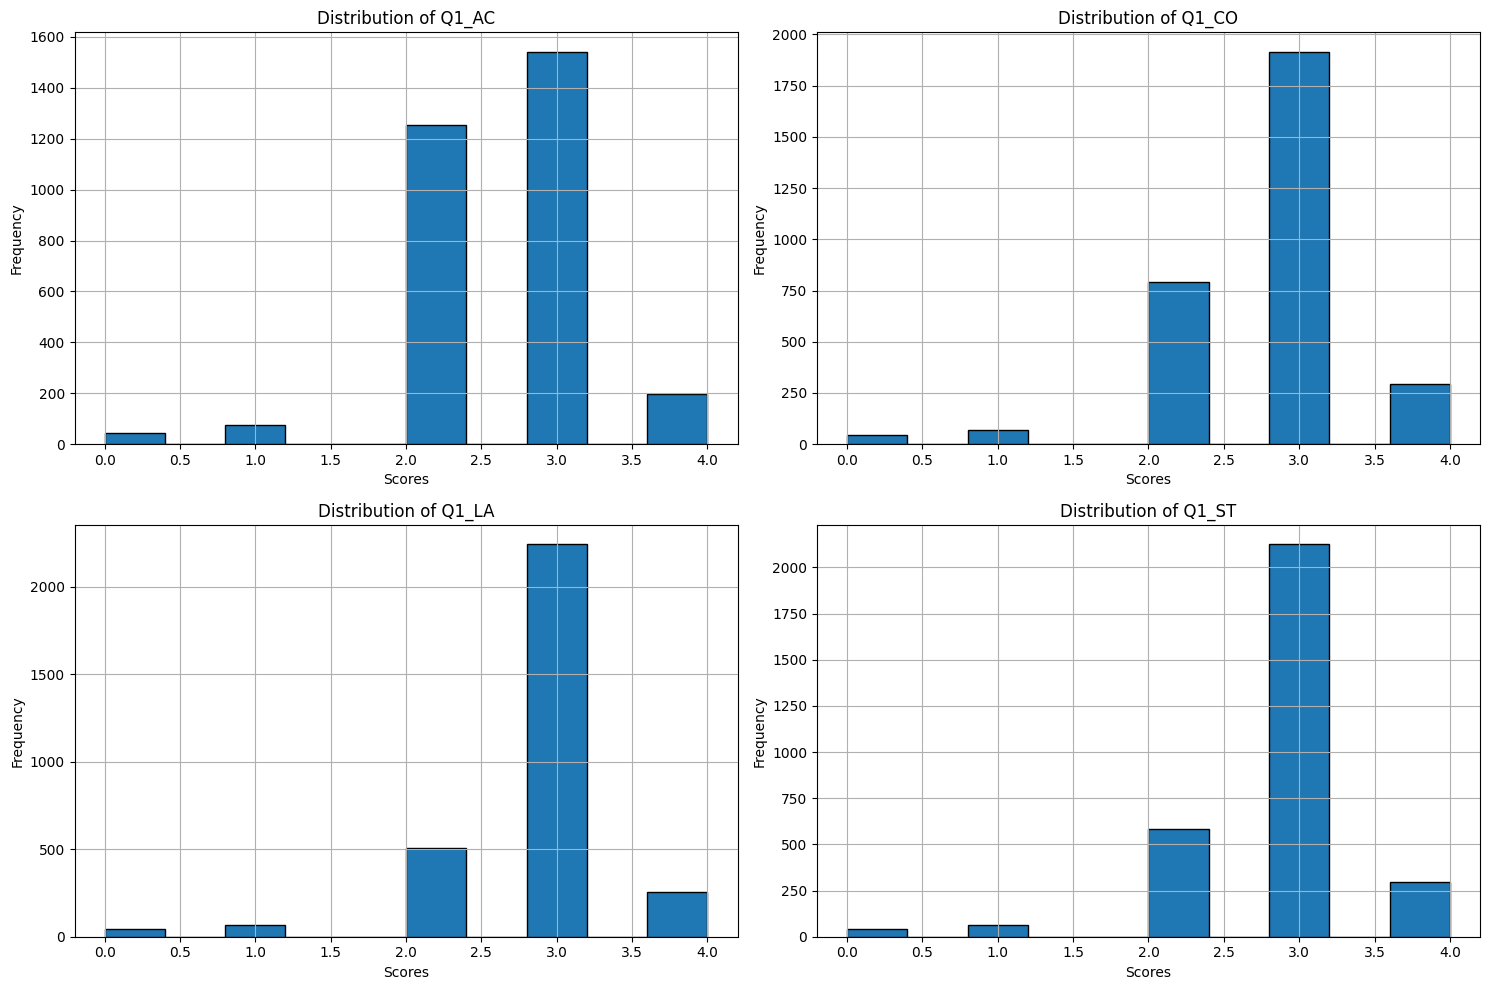

In [7]:
import matplotlib.pyplot as plt

score_columns = ['Q1_AC', 'Q1_CO', 'Q1_LA', 'Q1_ST']
plt.figure(figsize=(15, 10))

for i, column in enumerate(score_columns, 1):
    plt.subplot(2, 2, i)
    train_df[column].hist(bins=10, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Scores')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

          Q1_AC     Q1_CO     Q1_LA     Q1_ST
Q1_AC  1.000000  0.643360  0.717930  0.703982
Q1_CO  0.643360  1.000000  0.743352  0.715392
Q1_LA  0.717930  0.743352  1.000000  0.773614
Q1_ST  0.703982  0.715392  0.773614  1.000000


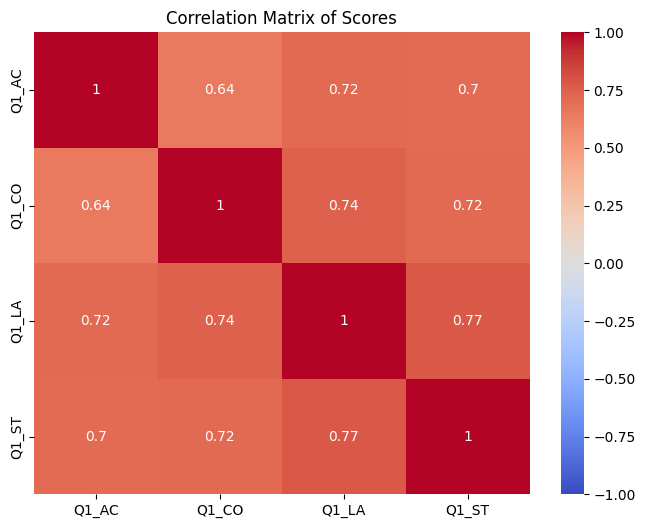

In [9]:
import seaborn as sns
correlation_matrix = train_df[['Q1_AC', 'Q1_CO', 'Q1_LA', 'Q1_ST']].corr()
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Scores')
plt.show()

In [12]:

sentence_length = [len(str(i)) for i in train_df["Response"]]
print("max length:", max(sentence_length))
print("min length:", min(sentence_length))
print("median length:", np.median(sentence_length))
print("average length:", np.mean(sentence_length))

print("90% sentence length:",np.percentile(sentence_length,90))

max length: 3344
min length: 0
median length: 958.0
average length: 1009.6225505942821
90% sentence length: 1345.0


In [13]:
nrows = train_df.shape[0]
count_zeros=0
for i in range(nrows):
    essay = train_df["Response"].iloc[i]
    total_score = train_df.loc[i, ["Q1_AC", "Q1_CO", "Q1_LA", "Q1_ST"]].sum()
    if total_score == 0:
        count_zeros += 1
        print(len(str(essay)), essay, "Total score:",total_score)
print("Total count of 0s:",count_zeros)

8 Anahera  Total score: 0
0  Total score: 0
49 Hi good afternoon Anahera Quinn I`m sayed Ahmad.  Total score: 0
222 Dear Anahera Quinn.
 
Hi my name is Rahila and i am a student from Hillmorton high school. 
I want to sigh up for delievring meals to people because i want to make this locul cumminty a better place for people to live in.  Total score: 0
264 Hi my name is Qrue and I want to help the people that need help with delivering meals or groceries to 100 people that need the food or groceries more then us. i will deliver meals to the poor people as much as i can. And i will deliver groceries to the people the  Total score: 0
233 to Anahera Quinn
 
im writing this to ask if i can help volunteer at a local homeless shelter like handing out food and water to all the homless men woman in christchurch and also help out with the cooking the food to hand out  
 
   Total score: 0
9 im batman Total score: 0
535 MY dad and mum are very rich i will pay u 200k if u let me pass !!
MY dad and 

0  Total score: 0
227 Hi my name is Josiah Clark and i think volunteering is a good thing to do because your helping out others willingly and helping out the community. Its good that your volunteering  because its helping you be a respectful person  Total score: 0
0  Total score: 0
263 Good morning andhera 
i am emaling to ask you about sining up for planting trees volinter work
i think it will be good because there will be more trees growing over time and making the place look alot beter and beter habiat for birds and other animls
 
thank
name Total score: 0
0  Total score: 0
0  Total score: 0
1163 

uestion one




Volunteers at a beach clean-up

You have been given the opportunity to be a part of National Volunteer Week.
Write an email to Anahera Quinn, the volunteering co-ordinator, to sign up and suggest a volunteering project you could work on.
A volunteering project could be helping at an event, delivering meals or groceries, planting trees, visiting people, or something else th

In [14]:
# check the essays shorter than 150 words
short_essay_len = 4.5 * 150
count_short=0
for i in range(nrows):
    essay = train_df["Response"].iloc[i]
    total_score = train_df.loc[i, ["Q1_AC", "Q1_CO", "Q1_LA", "Q1_ST"]].sum()
    if len(str(essay) )< 200:
        count_short += 1
        print(len(str(essay)), essay, "Total score:",total_score)
print("Total count of 0s:",count_short)

# conclusion: essay charactor length shorter than 200 are marked as 0. This rule can apply to test dataset directly.

8 Anahera  Total score: 0
0  Total score: 0
49 Hi good afternoon Anahera Quinn I`m sayed Ahmad.  Total score: 0


9 im batman Total score: 0
0  Total score: 0
127 Dear Anahera Quinn 
 
Hello my name is Kaeden Stick. I am emailing you to suggest a voluntering project that we could work on.  Total score: 0
1 ? Total score: 0
169 hello, my name is Tyler, i am 14 years old and a year 10 from Massey high school.
 
i am willing to do some volunteer work like cleaning up the beachs and planting trees Total score: 0
14 dear anahera q Total score: 0
53 i dont know how to do this nearly well enough to pass Total score: 0
0  Total score: 0
0  Total score: 0
0  Total score: 0
0  Total score: 0
3  
  Total score: 0
29 In Japan I was did volunteer. Total score: 0
0  Total score: 0
35 I am mae cunningham  
 
    Email   Total score: 4
52 Hi my name is Luke
I am only going to work for money Total score: 0
0  Total score: 0
0  Total score: 0
1 ? Total score: 0
0  Total score: 0
178 My name is Dgypt Tawera 
 
I'd like to volunteer to help at events and further on, i think volunteering for events is just to help peo

In [16]:
nrows = train_df.shape[0]
longest_essay = []
for i in range(nrows):
    essay = train_df["Response"].iloc[i]
    
    if len(str(essay) ) > 1345:
        longest_essay.append(True)
    else:
        longest_essay.append(False)
essay_long = train_df[longest_essay]  
print(essay_long)

       Unique_ID                                           Response  Q1_AC  \
0     6903086772  Dear Anahera Quinn, \nMy name is Gracy Patel a...      3   
11    6830438447  Dear Anahera Quinn, I am Chase Kennedy from Oa...      2   
12    6814289703  Hi there,\n \nMy name is Ilaisaane. I am fourt...      3   
17    6831930200  Dear Anahera Quinn,\n \nMy name is Angelina Bo...      3   
44    6831924369  Dear Anahera Quinn,\n \nI hope you are doing w...      2   
...          ...                                                ...    ...   
3048  6903131702  To Anahera Quinn \n \nMy name is Greer Bettrid...      3   
3060  6903119560  Dear Anahera Quinn\n \nThe Volunteering Co-ord...      3   
3067  6887052814  My name is unique i live in north-land New Zea...      2   
3073  6825390035   \nHello Anahera Quinn You have been given the...      3   
3097  6833516214  Good evening Mrs Quinn, I'm Mina Akbaba a 15-y...      3   

      Q1_CO  Q1_LA  Q1_ST  
0         4      3      4  
11     

In [17]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
essay_text = essay_long["Response"].iloc[1]

# Tokenize the essay
tokens = tokenizer.encode_plus(
    essay_text,
    add_special_tokens=True,
    truncation=True
)

# Print the number of tokens
print(f"Number of tokens: {len(tokens['input_ids'])}")

/Users/JessieD/miniconda3/envs/nlp_311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of tokens: 321


In [5]:
embeddings = pd.read_csv("output/trained_model/bertbase/bert_embeddings_Q1.csv")
embeddings.shape


(3113, 7)

In [6]:
embeddings.head()

,Unique_ID,Response,AC,CO,LA,ST,Embedding
0,6903086772,"Dear Anahera Quinn, \nMy name is Gracy Patel a...",4.0,5.0,4.0,5.0,"tensor(6831173653),[-0.7078692 -0.6635655 -0..."
1,6814957487,Dear Anahera Quinn\n \nI am writing this email...,4.0,4.0,4.0,4.0,"tensor(6833514901),[-0.8040581 -0.617949 -0..."
2,6814959051,Dear Anahera Quinn\n \nHello my name is Tyrese...,4.0,4.0,4.0,4.0,"tensor(6827647648),[-0.37436762 -0.55181444 -0..."
3,6816734129,"Dear Anahera Quinn,\n \nMy name is Hannah Fene...",4.0,4.0,4.0,4.0,"tensor(6814216893),[-0.6197169 -0.63102055 -0..."
4,6827882909,"Dear Anahera Quinn,\n \nHi, Isla Smith here,I ...",4.0,4.0,4.0,4.0,"tensor(6814215040),[-4.56805944e-01 -6.3016450..."
